## Question 3b

In [3]:
import numpy as np

# Define the Gibbs sampler function
def gibbs_sampler(num_samples):
    x, y = 1, 1 # Starting values of x and y
    samples = np.zeros((num_samples, 2)) # Initialize array to store samples
    for i in range(num_samples):
        # Sample x from the conditional distribution p(x|y)
        x = np.random.gamma(2, 1/(y+1))
        # Sample y from the conditional distribution p(y|x)
        y = np.random.gamma(2, 1/(x+1))
        samples[i, :] = [x, y] # Store the sample
    return samples

# Run the Gibbs sampler to generate 1000 samples
samples = gibbs_sampler(1000)

# Print the first 10 samples
print(samples[:10, :])

[[0.42279098 0.53178398]
 [2.61115429 1.65264457]
 [0.58446584 1.32799335]
 [0.74948311 1.65047741]
 [0.23625348 0.91401076]
 [1.6720498  0.35718051]
 [1.97547513 0.82911679]
 [0.52865961 0.48994693]
 [1.40404684 0.33551519]
 [0.63098669 1.83454849]]


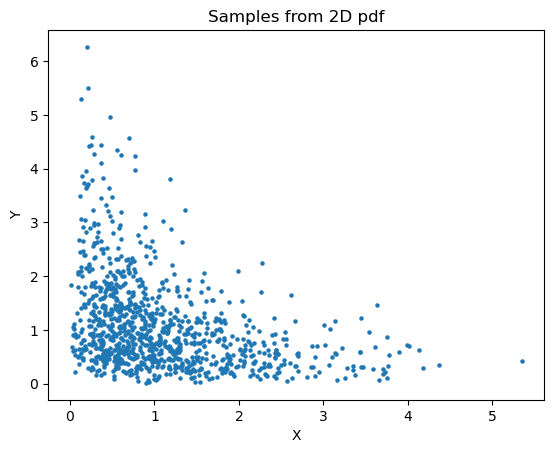

In [4]:
import matplotlib.pyplot as plt

# Plot the sampled points
plt.scatter(samples[:, 0], samples[:, 1], s=5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Samples from 2D pdf")
plt.show()


### Question 4

In [5]:
import pymc3 as pm
import numpy as np

# Define the data
r = np.array([10, 40, 90, 160, 150, 120, 70])  # number of YES answers in each district
n = np.array([100, 200, 300, 400, 300, 200, 100])  # total number of responses in each district
J = len(r)  # number of districts

# Define the model
with pm.Model() as model:
    # Priors for hyperparameters
    alpha = pm.Uniform('alpha', lower=0, upper=100)
    beta = pm.Uniform('beta', lower=0, upper=100)

    # Parameters of interest
    theta = pm.Beta('theta', alpha=alpha, beta=beta, shape=J)

    # Likelihood
    r_obs = pm.Binomial('r_obs', n=n, p=theta, observed=r)

    # MCMC settings
    trace_model1 = pm.sample(draws=5000, tune=1000, chains=3)

# Print the summary of the posterior distributions
pm.summary(trace_model1)


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\Users\Danita\AppData\Roaming\Python\Python39\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [theta, beta, alpha]


Sampling 3 chains for 1_000 tune and 5_000 draw iterations (3_000 + 15_000 draws total) took 311 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Danita\AppData\Roaming\Python\Python39\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,3.375,1.596,0.862,6.373,0.022,0.018,7218.0,4344.0,1.0
beta,5.194,2.492,1.104,9.622,0.034,0.029,7164.0,4716.0,1.0
theta[0],0.123,0.033,0.065,0.186,0.000,0.000,15230.0,8136.0,1.0
theta[1],0.208,0.028,0.155,0.263,0.000,0.000,18000.0,9700.0,1.0
theta[2],0.302,0.026,0.254,0.353,0.000,0.000,18353.0,9255.0,1.0
theta[3],0.400,0.024,0.357,0.446,0.000,0.000,17374.0,9689.0,1.0
theta[4],0.497,0.028,0.448,0.553,0.000,0.000,18680.0,9470.0,1.0
theta[5],0.592,0.034,0.528,0.655,0.000,0.000,18088.0,9478.0,1.0
theta[6],0.677,0.046,0.592,0.763,0.000,0.000,15379.0,10739.0,1.0


C:\Users\Danita\AppData\Local\Temp\ipykernel_29056\2021224649.py:4: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_model1)
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Danita\AppData\Roaming\Python\Python39\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


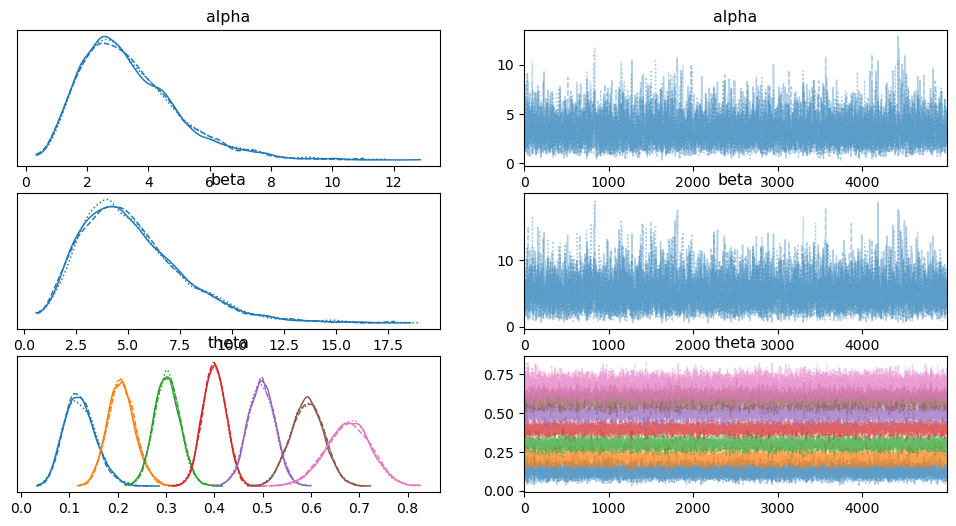

In [6]:
import matplotlib.pyplot as plt

# Plot the posterior distribution of theta for each district
pm.traceplot(trace_model1)

plt.show()


Got error No model on context stack. trying to find log_likelihood in translation.


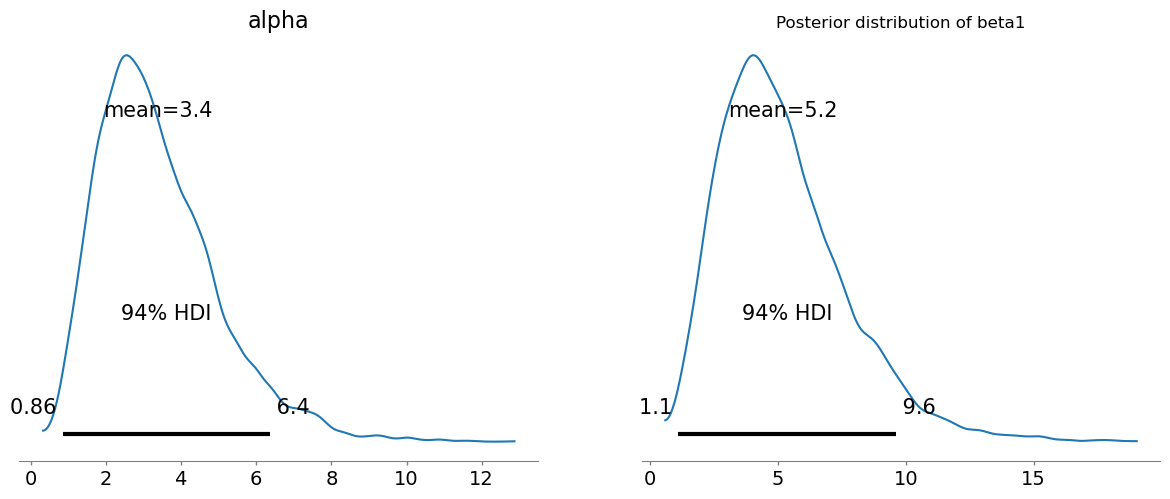

In [12]:
import matplotlib.pyplot as plt

# Plot the posterior distribution of beta0 and beta1
pm.plot_posterior(trace_model1, var_names=['alpha', 'beta'])

# Add titles to the plots
plt.title('Posterior distribution of beta0')
plt.title('Posterior distribution of beta1')

# Show the plots
plt.show()

## Question 4

In [8]:
import numpy as np
import pymc3 as pm

# Define the data
n = np.array([100, 200, 300, 400, 300, 200, 100])
r = np.array([10, 40, 90, 160, 150, 120, 70])
d = np.array([7, 6, 5, 4, 3, 2, 1])

# Define the model
with pm.Model() as model:
    # Priors for the parameters
    beta0 = pm.Uniform('beta0', lower=-10, upper=10)
    beta1 = pm.Uniform('beta1', lower=-10, upper=10)
    sigma = pm.Uniform('sigma', lower=0, upper=100)
    
    # Prior of theta
    theta = pm.math.invlogit(beta0 + beta1 * d)

    # #The likelihood of the number of YES answers in group j, r_j
    likelihood = pm.Binomial('likelihood', n=n, p=theta, observed=r)
    
    # Define the theta variable and add it to the trace. 
    theta_var = pm.Deterministic('theta', theta)
    
    # Sample from the posterior distribution
    trace_model2 = pm.sample(5000, chains=3, target_accept=0.9)
    
pm.summary(trace_model2)

C:\Users\Danita\AppData\Roaming\Python\Python39\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [sigma, beta1, beta0]


Sampling 3 chains for 1_000 tune and 5_000 draw iterations (3_000 + 15_000 draws total) took 314 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Danita\AppData\Roaming\Python\Python39\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta0,1.376,0.153,1.107,1.678,0.002,0.001,5735.0,6749.0,1.0
beta1,-0.458,0.038,-0.528,-0.387,0.001,0.000,5680.0,6481.0,1.0
sigma,49.482,28.976,0.103,93.825,0.330,0.241,7219.0,5923.0,1.0
theta[0],0.139,0.016,0.110,0.169,0.000,0.000,6945.0,9034.0,1.0
theta[1],0.203,0.016,0.173,0.234,0.000,0.000,7945.0,9887.0,1.0
theta[2],0.287,0.014,0.260,0.315,0.000,0.000,10935.0,10804.0,1.0
theta[3],0.388,0.013,0.364,0.413,0.000,0.000,16059.0,10772.0,1.0
theta[4],0.501,0.015,0.472,0.530,0.000,0.000,9462.0,10028.0,1.0
theta[5],0.613,0.020,0.575,0.651,0.000,0.000,6641.0,8005.0,1.0
theta[6],0.714,0.024,0.669,0.759,0.000,0.000,5954.0,7062.0,1.0


C:\Users\Danita\AppData\Local\Temp\ipykernel_29056\83463978.py:4: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_model2)
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Danita\AppData\Roaming\Python\Python39\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


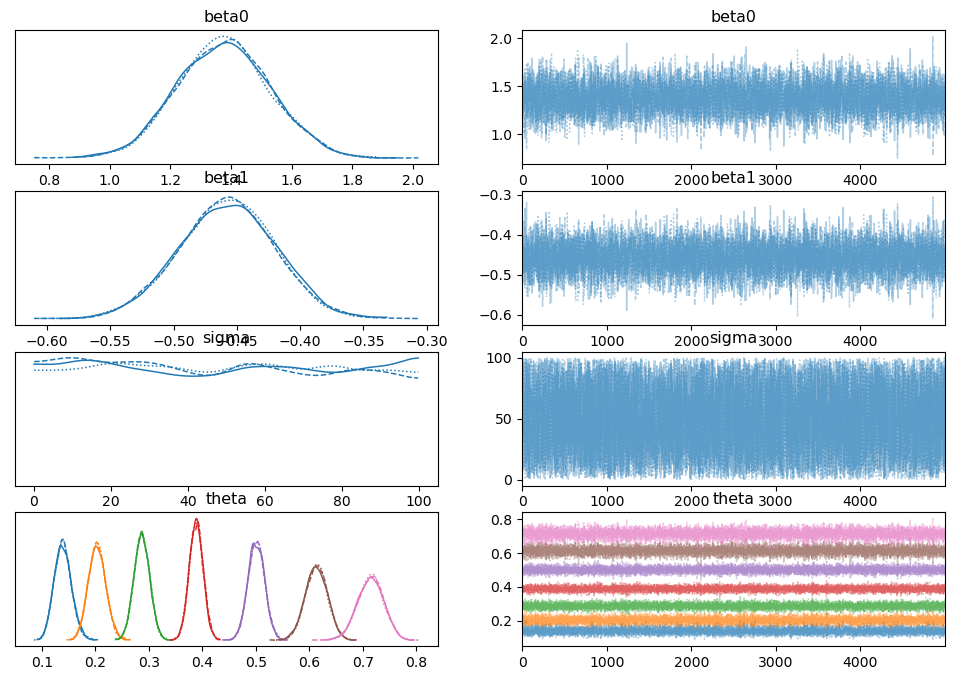

In [9]:
import matplotlib.pyplot as plt

# Plot the posterior distribution of theta for each district
pm.traceplot(trace_model2)

plt.show()

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Danita\AppData\Roaming\Python\Python39\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


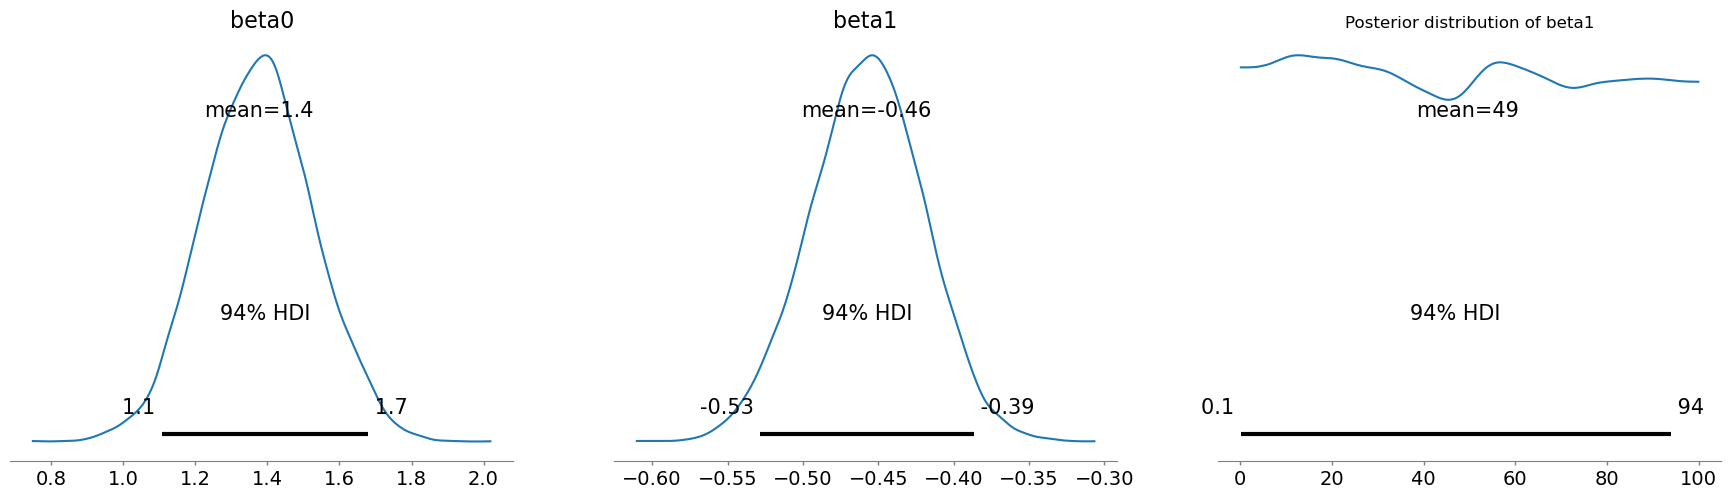

In [11]:
import matplotlib.pyplot as plt

# Plot the posterior distribution of beta0 and beta1
pm.plot_posterior(trace_model2, var_names=['beta0', 'beta1', 'sigma'])

# Add titles to the plots
plt.title('Posterior distribution of beta0')
plt.title('Posterior distribution of beta1')

# Show the plots
plt.show()